In [61]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.colors as mcolors

In [43]:
seed = 42

# Homework 4

## 1 The Bias Variance Trade-off

### 1.1 Theoretical Decomposition of the Mean Squared Error

done on paper

### 1.2 Practical Demonstration of the Bias-Variance Trade-Off

read and done

## 2 Polynomial Kernel SVM

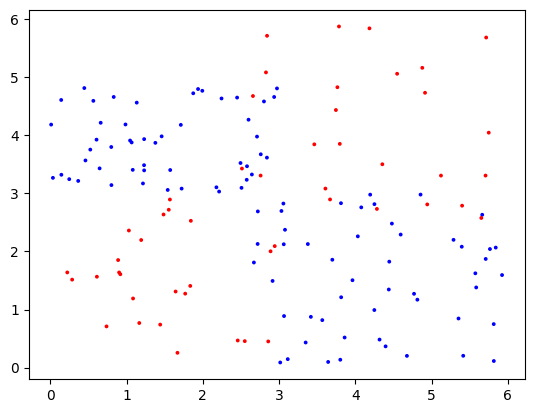

In [4]:
# 1. Load the data
datapoints = np.load('svm_data_3.npy')
X, Y, label = datapoints[:,0], datapoints[:,1], datapoints[:,2]

plt.scatter(X,Y,3, label, cmap='bwr')
plt.show()

In [5]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    datapoints[:,:2], 
    datapoints[:,2], 
    test_size=0.2, 
    random_state=seed,
    )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [6]:
# 2. Train the SVM
grid = {
    'C': [1, 1.5, 2, 2.5], 
    'gamma': [0.2, 0.1, 'scale'],
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5, 6],
    'coef0': [2, -1, 0, 1, 2, 3],
} 

clf = GridSearchCV(SVC(), grid, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_test, y_test))

{'C': 1, 'coef0': 2, 'degree': 5, 'gamma': 0.2, 'kernel': 'poly'}
0.9333333333333333


/usr/lib/python3/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [96]:
def plot_decision_boundary(clf, X_train, y_train, X_test, y_test, X, Y, title):
    dark_cmap = mcolors.ListedColormap(["#9E7702", "#980026"])
    light_cmap = mcolors.ListedColormap(["#FFC500", "#D46591"])

    w0_values = np.arange( X.min() - 0.1, X.max() + 0.1, 0.01)
    w1_values = np.arange( Y.min() - 0.1, Y.max() + 0.1, 0.01)
    W0, W1 = np.meshgrid(w0_values, w1_values)
    grid = np.c_[W0.ravel(), W1.ravel()]
    Z = clf.predict(grid).reshape(W0.shape)

    plt.contourf(W0, W1, Z, cmap=light_cmap, levels=[-1, 0, 1])
    plt.contour(W0, W1, Z, colors='black', linewidths=0.5)

    for target in range(2):
        plt.scatter(*X_train[y_train == target].T, color=dark_cmap(target), label=f"{target} (train)", edgecolors='black', zorder=2, marker='o')
        plt.scatter(*X_test[y_test == target].T, color=dark_cmap(target), label=f"{target} (test)", edgecolors='black', zorder=2, marker='s')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()


def plot_decision_boundary2(clf, X, Y, title):


    w0_values = np.arange( X.min() - 0.1, X.max() + 0.1, 0.01)
    w1_values = np.arange( Y.min() - 0.1, Y.max() + 0.1, 0.01)
    W0, W1 = np.meshgrid(w0_values, w1_values)
    grid = np.c_[W0.ravel(), W1.ravel()]
    Z = clf.predict(grid).reshape(W0.shape)
    plt.contourf(W0, W1, Z, levels=60)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

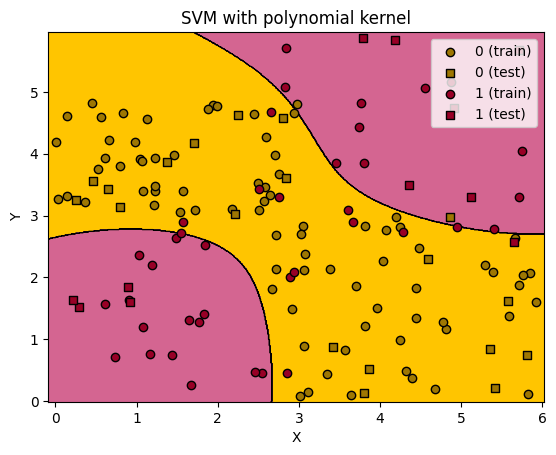

In [18]:
# plot the decision boundary

plot_decision_boundary(clf, X_train, y_train, X_test, y_test, X, Y, 'SVM with polynomial kernel')

In [15]:
# 2. Train the SVM
grid = {
    'C': [1, 1.5, 2, 2.5], 
    'gamma': [0.2, 0.1, 'scale'],
    'kernel': ['rbf'],
    'coef0': [2, -1, 0, 1, 2, 3],
} 

clf = GridSearchCV(SVC(), grid, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_test, y_test))

{'C': 2.5, 'coef0': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.9333333333333333


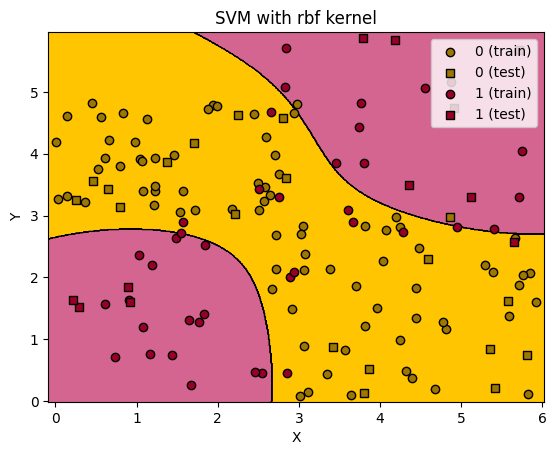

In [19]:
plot_decision_boundary(clf, X_train, y_train, X_test, y_test, X, Y, 'SVM with rbf kernel')

### Model Selection for Polynomial Regression

(1000, 3)


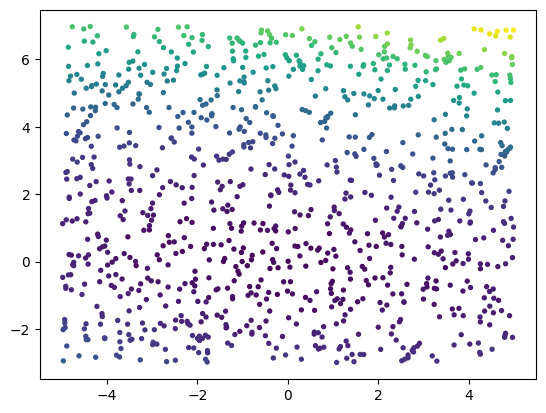

In [32]:
datapoints = np.load('poly_dataset.npy')
X, Y, label = datapoints[:,0], datapoints[:,1], datapoints[:,2]
plt.scatter(X,Y,8, label)
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    datapoints[:,:2],
    datapoints[:,2], 
    test_size=0.2, 
    random_state=seed
    )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 2) (200, 2) (800,) (200,)


In [65]:
def fit_polynomial(x, y, degree, ridge):
    model = make_pipeline(
        PolynomialFeatures(degree), 
        Ridge(
            alpha=ridge,
            fit_intercept=False
            )
        )
    model.fit(x, y)
    return model

score: 0.9979
mse: 1.0541


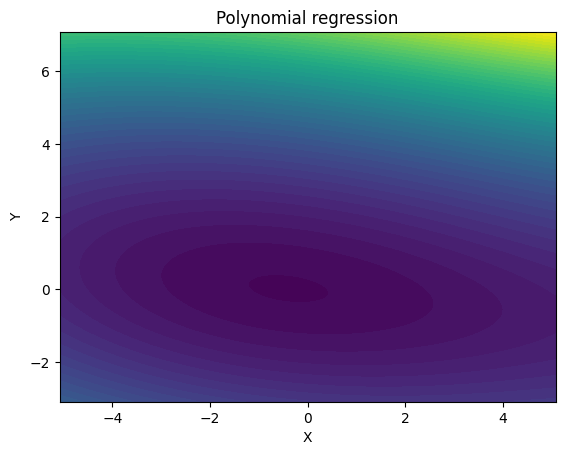

In [97]:
grid = {
    'degree': [1,2,3,4,5,6],
    'C': [0.0, 0.001, 0.01, 0.1],
}
params = it.product(grid['degree'], grid['C'])
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

score = []
for param in params:
    mse = []
    for train_index, test_index in kfold.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        model = fit_polynomial(X_train_fold, y_train_fold, param[0], param[1])
        y_pred = model.predict(X_test_fold)
        mse.append(mean_squared_error(y_test_fold, y_pred))
    score.append((param, np.mean(mse)))

best_param = min(score, key=lambda x: x[1])[0]

model = fit_polynomial(X_train, y_train, best_param[0], best_param[1])
y_pred = model.predict(X_test)
print(f"score: {model.score(X_test, y_test):.4f}")
print(f"mse: {mean_squared_error(y_test, y_pred):.4f}")


plot_decision_boundary2(model, X, Y, 'Polynomial regression')